In [1]:
pred_days = 15
reward = 10
risk =1
days_shape = 60
eps = 150

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
mass_data = pd.read_csv('X_big_ones_06.csv')

In [4]:
X = mass_data.drop('result',axis='columns')
X.reset_index()
X = X.drop(['Unnamed: 0'],axis=1)
y = mass_data["result"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [5]:
#X.columns

In [6]:
#y
#X.drop('Unnamed: 0')
#X.iloc[:,0]

In [7]:
#X

In [8]:
X_train.shape

(35636, 3540)

In [9]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,3530,3531,3532,3533,3534,3535,3536,3537,3538,3539
4951,-4.808818,-2.919325,-5.408796,-6.313245,-7.378887,-7.629630,-7.146060,-5.372974,-9.501218,-11.256388,...,-10.754790,-13.202976,-14.673444,-12.647630,-14.055530,-15.846693,-16.222137,-15.111455,-13.202976,-13.992963
42347,-0.338118,0.102530,-1.173592,-2.257755,-6.853970,-8.950303,-8.915399,-9.929752,-9.044099,-3.566598,...,23.225098,23.344757,23.628643,25.634650,26.892220,25.843466,25.714424,25.357801,27.804890,27.255880
28874,-2.272727,1.033058,1.570249,4.173556,2.396695,3.471072,6.570245,8.016526,3.636365,0.123968,...,-6.988277,-8.611358,-8.115419,-12.173129,-12.353469,-7.348964,-8.881874,-11.451756,-9.332730,-4.733994
31660,0.156843,0.087138,0.026135,1.211226,-0.121996,0.296273,0.017423,0.967234,3.285113,2.509579,...,22.689398,23.707756,25.736769,24.240084,25.389599,25.065575,24.718407,25.219872,22.342230,20.714397
9422,-5.139181,-4.710922,-4.389720,-2.355457,-10.599573,-9.207707,-12.526763,-13.276233,-13.169160,-14.132759,...,2.597403,0.389614,-0.649351,-0.909087,-0.519482,-1.298701,-1.688316,-1.298701,-3.116885,-2.077920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,-1.859254,-3.778481,-5.917628,-6.377441,-7.996801,-8.176722,-8.596561,-8.936428,-14.094362,-16.893242,...,5.642027,-3.643434,0.176866,-0.725146,2.635307,-3.307384,-5.359036,-5.447468,-7.552167,-5.447468
35814,0.021922,0.153444,0.569927,-0.219202,-2.104335,0.372646,-1.402892,-2.367380,-1.797453,-3.726436,...,26.261011,27.682150,28.502800,29.683750,28.742996,29.703762,28.542835,29.183350,28.763012,29.823858
20463,-1.874165,-6.425707,-7.764395,-9.906294,-7.496662,-8.299872,-6.024096,-6.291841,-1.472565,-3.078987,...,-6.792059,-7.941491,-5.015677,-6.060609,-5.015677,-4.806694,-10.240338,-6.478584,-10.449321,-10.762804
18638,-4.138977,-3.564951,-5.679755,-3.474320,-0.845918,-7.145013,-5.181267,-6.676739,-7.583084,-8.731116,...,-4.999373,-7.587430,-12.536303,-16.576197,-8.243915,-10.920339,-10.036612,-13.281154,-16.702444,-14.960233


In [10]:
X_test.shape

(8910, 3540)

In [11]:
X_test.iloc[0].shape

(3540,)

In [12]:
aess = X_test.shape[1]

In [13]:
import numpy as np

X_train1 = np.asarray(X_train).astype(np.float32)
X_test1 = np.asarray(X_test).astype(np.float32)
y_train1 = np.asarray(y_train).astype(np.float32)
y_test1 = np.asarray(y_test).astype(np.float32)

In [14]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(aess,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train1, y_train1, epochs=eps, batch_size=64, validation_data=(X_test1, y_test1))


#model.fit(X_train1, y_train1, epochs=eps)

Epoch 1/150
557/557 [==============================] - 7s 9ms/step - loss: 0.1965 - accuracy: 0.9181 - val_loss: 0.1032 - val_accuracy: 0.9599
Epoch 2/150
557/557 [==============================] - 5s 9ms/step - loss: 0.1119 - accuracy: 0.9554 - val_loss: 0.0660 - val_accuracy: 0.9752
Epoch 3/150
557/557 [==============================] - 5s 9ms/step - loss: 0.1057 - accuracy: 0.9567 - val_loss: 0.0704 - val_accuracy: 0.9724
Epoch 4/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0930 - accuracy: 0.9628 - val_loss: 0.0519 - val_accuracy: 0.9853
Epoch 5/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0889 - accuracy: 0.9648 - val_loss: 0.0881 - val_accuracy: 0.9627
Epoch 6/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0854 - accuracy: 0.9671 - val_loss: 0.0543 - val_accuracy: 0.9850
Epoch 7/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0802 - accuracy: 0.9685 - val_loss: 0.0526 - val_accuracy: 0.9817

Epoch 58/150
557/557 [==============================] - 5s 8ms/step - loss: 0.0417 - accuracy: 0.9838 - val_loss: 0.3486 - val_accuracy: 0.9889
Epoch 59/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0430 - accuracy: 0.9832 - val_loss: 0.0860 - val_accuracy: 0.9870
Epoch 60/150
557/557 [==============================] - 5s 8ms/step - loss: 0.0419 - accuracy: 0.9838 - val_loss: 0.1187 - val_accuracy: 0.9882
Epoch 61/150
557/557 [==============================] - 4s 8ms/step - loss: 0.0422 - accuracy: 0.9835 - val_loss: 0.1883 - val_accuracy: 0.9860
Epoch 62/150
557/557 [==============================] - 5s 8ms/step - loss: 0.0411 - accuracy: 0.9837 - val_loss: 0.0445 - val_accuracy: 0.9910
Epoch 63/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0369 - accuracy: 0.9852 - val_loss: 0.0365 - val_accuracy: 0.9901
Epoch 64/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0409 - accuracy: 0.9844 - val_loss: 0.1381 - val_accuracy:

Epoch 115/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0285 - accuracy: 0.9895 - val_loss: 0.1305 - val_accuracy: 0.9888
Epoch 116/150
557/557 [==============================] - 5s 8ms/step - loss: 0.0297 - accuracy: 0.9890 - val_loss: 0.0780 - val_accuracy: 0.9879
Epoch 117/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0291 - accuracy: 0.9890 - val_loss: 0.0784 - val_accuracy: 0.9906
Epoch 118/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0289 - accuracy: 0.9887 - val_loss: 0.1364 - val_accuracy: 0.9878
Epoch 119/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0295 - accuracy: 0.9884 - val_loss: 0.1784 - val_accuracy: 0.9877
Epoch 120/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0294 - accuracy: 0.9882 - val_loss: 0.0782 - val_accuracy: 0.9901
Epoch 121/150
557/557 [==============================] - 5s 9ms/step - loss: 0.0264 - accuracy: 0.9898 - val_loss: 0.3913 - val_ac

In [15]:
model.evaluate(X_test1, y_test1)

279/279 [==============================] - 1s 3ms/step - loss: 0.2501 - accuracy: 0.9888


[0.2500709891319275, 0.988776683807373]

In [16]:
yp = model.predict(X_test)
yp[:5]

279/279 [==============================] - 1s 2ms/step


array([[9.9999177e-01],
       [9.9999499e-01],
       [1.9162908e-04],
       [1.1322098e-03],
       [9.9999940e-01]], dtype=float32)

In [17]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [18]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4444
         1.0       0.98      1.00      0.99      4466

    accuracy                           0.99      8910
   macro avg       0.99      0.99      0.99      8910
weighted avg       0.99      0.99      0.99      8910



Text(95.72222222222221, 0.5, 'Truth')

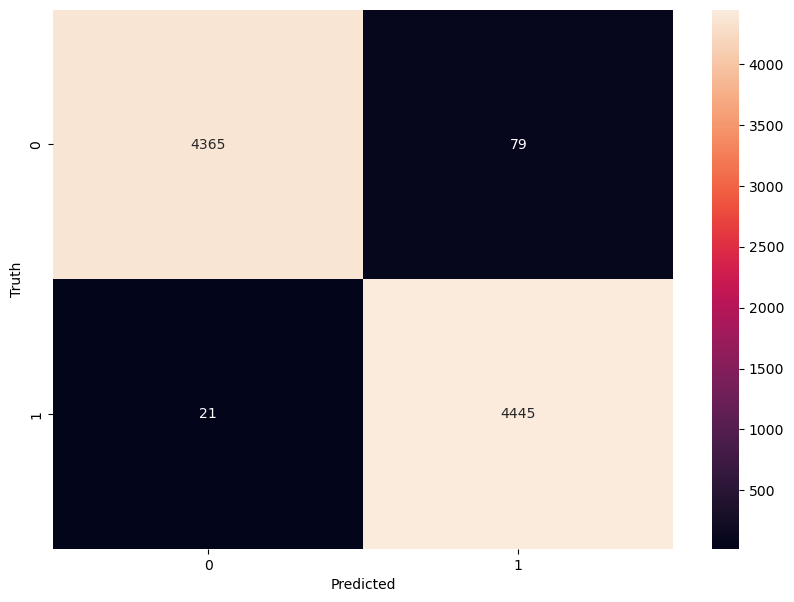

In [19]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test1,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
#import joblib

In [21]:
#joblib.dump(model,'model_filtered_data01.pkl')

In [22]:
from keras.models import load_model
model.save('model_filtered_data02.h5')